# Natural Language Processing Project

This project aims to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

### Dataset: Yelp Review Data Set from Kaggle.

Each observation in this dataset is a review of a particular business by a particular user. The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review. The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business. The "useful" and "funny" columns are similar to the "cool" column.

In [1]:
#Basic imports
import nltk
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Loading the Dataset

Let's load the data using Pandas and perform the statistical analysis

In [2]:
yelp =  pd.read_csv('yelp.csv')

yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


Let's create a new column called the txt_length - indicating the number of words in the text column.

In [4]:
yelp['txt_length'] = yelp['text'].apply(len)

### EDA

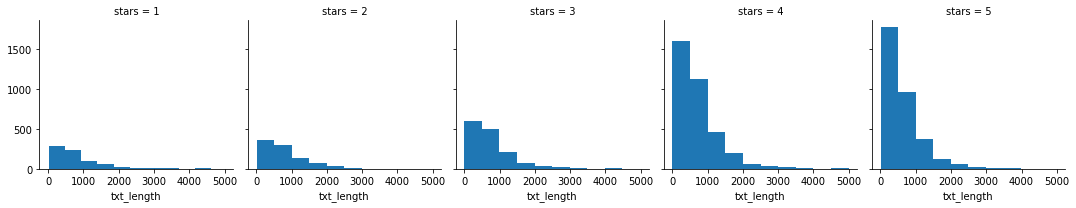

In [5]:
# Let's see if there are any correlation between txt_length and the star ratings

g = sns.FacetGrid(yelp, col = 'stars')
g.map(plt.hist,'txt_length')

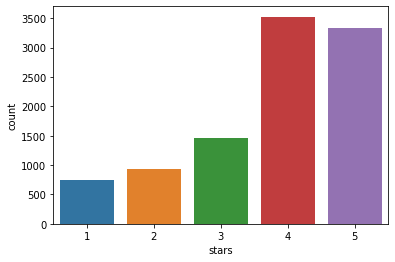

In [6]:
# number of occurrences for each type of star rating.

sns.countplot(x = 'stars', data = yelp)

In [7]:
# Let's use heatmaps to understand the corelation between stars and numerical columns

stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,txt_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


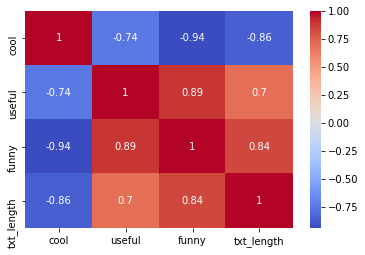

In [8]:
sns.heatmap(stars.corr(), cmap = 'coolwarm',annot = True)

### Feature and Targets

To make things a little easier, let's go ahead and only grab reviews that were either 1 star or 5 stars, and create two objects X(feature) and y(target). X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class.

In [9]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]

X = yelp_class['text']
y = yelp_class['stars']

In [10]:
# Separate out the training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print('Shape of Training sets: ',X_train.shape, y_train.shape)
print('Shape of Testing sets: ',X_test.shape, y_test.shape)

Shape of Training sets:  (3268,) (3268,)
Shape of Testing sets:  (818,) (818,)


### NLP Classifier

Use the classic BagOfWords technique to convert the textual data into vectors which could then be used to train models.

In [11]:
# Bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test =  cv.transform(X_test)
print('Shape of Training and testing features: ',X_train.shape, X_test.shape)

Shape of Training and testing features:  (3268, 17262) (818, 17262)


In [12]:
# Training the Model

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
# Prediction and Evaluation
predictions = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      0.69      0.78       154
           5       0.93      0.98      0.96       664

    accuracy                           0.93       818
   macro avg       0.91      0.84      0.87       818
weighted avg       0.92      0.93      0.92       818



Multinomial classifier has an accuracy of 91%.

#### That's it! Happy Learning :)